In [48]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
Boys1 = [3, 5, 2, 4, 4, 5, 4, 5, 5, 3, 4]
Girls1 = [5, 5, 6, 6, 5, 6, 6, 4, 8, 5, 4]

Boys2 = [3, 4, 5, 3, 3, 4, 6, 4, 2, 5, 3]
Girls2 = [6, 8, 8, 6, 6, 7, 8, 6, 8, 3, 9]

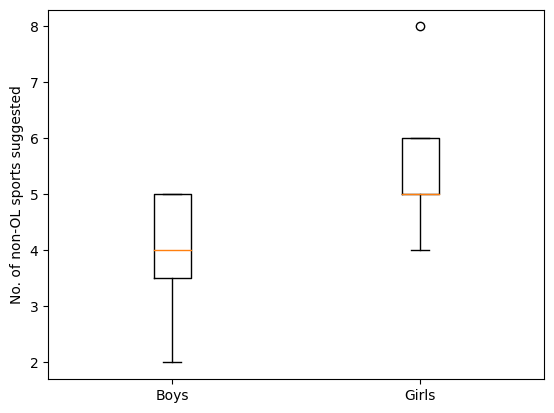

In [50]:
dd = [Boys1,Girls1]
plt.boxplot(dd)
plt.xticks([1, 2], ["Boys","Girls"])
plt.ylabel('No. of non-OL sports suggested')
plt.show()

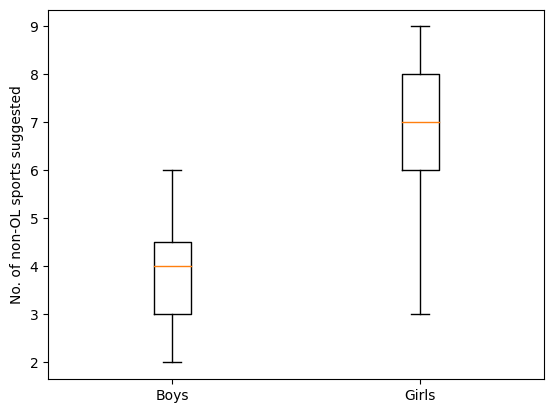

In [51]:
dd = [Boys2,Girls2]
plt.boxplot(dd)
plt.xticks([1, 2], ["Boys","Girls"])
plt.ylabel('No. of non-OL sports suggested')
plt.show()

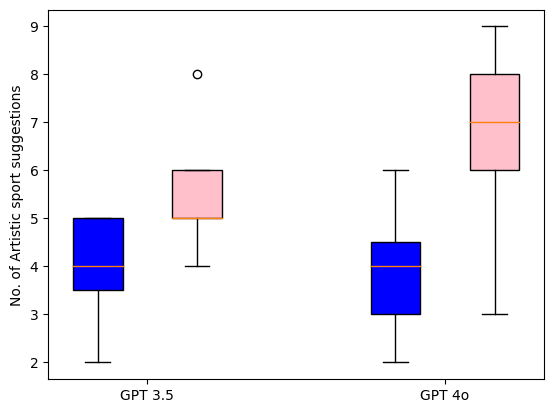

In [52]:
# Combine the data into a list with adjusted positions


data = [Boys1, Girls1, Boys2, Girls2]

# Create the box plot with custom positions
fig, ax = plt.subplots()
box = ax.boxplot(data, positions=[1, 2, 4, 5], patch_artist=True)

# Colors for boys and girls
colors = ['blue', 'pink', 'blue', 'pink']

# Apply colors to each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Set the x-axis labels
ax.set_xticks([1.5, 4.5])
ax.set_xticklabels(["GPT 3.5", "GPT 4o"])

# Set the y-axis label
plt.ylabel('No. of Artistic sport suggestions')

# Display the plot
plt.show()

In [53]:
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals
ci_boys1 = calculate_confidence_interval(Boys1)
ci_girls1 = calculate_confidence_interval(Girls1)
ci_boys2 = calculate_confidence_interval(Boys2)
ci_girls2 = calculate_confidence_interval(Girls2)

# Perform t-tests
t_boys, p_boys = stats.ttest_ind(Boys1, Boys2)
t_girls, p_girls = stats.ttest_ind(Girls1, Girls2)
t_gpt3, p_gpt3 = stats.ttest_ind(Boys1, Girls1)
t_gpt4, p_gpt4 = stats.ttest_ind(Boys2, Girls2)

# Create a summary table
summary_table = pd.DataFrame({
    "Group": ["Boys GPT 3.5", "Girls GPT 3.5", "Boys GPT 4o", "Girls GPT 4o"],
    "Mean": [ci_boys1[0], ci_girls1[0], ci_boys2[0], ci_girls2[0]],
    "CI Lower": [ci_boys1[1], ci_girls1[1], ci_boys2[1], ci_girls2[1]],
    "CI Upper": [ci_boys1[2], ci_girls1[2], ci_boys2[2], ci_girls2[2]],
    "p-value (vs other model)": [p_boys, p_girls, p_boys, p_girls],
    "p-value (vs opposite gender)": [p_gpt3, p_gpt3, p_gpt4, p_gpt4]
})

print(summary_table)

           Group      Mean  CI Lower  CI Upper  p-value (vs other model)  \
0   Boys GPT 3.5  4.000000  3.328191  4.671809                  0.699035   
1  Girls GPT 3.5  5.454545  4.696643  6.212448                  0.035781   
2    Boys GPT 4o  3.818182  3.033678  4.602686                  0.699035   
3   Girls GPT 4o  6.818182  5.701354  7.935010                  0.035781   

   p-value (vs opposite gender)  
0                      0.004496  
1                      0.004496  
2                      0.000087  
3                      0.000087  


90


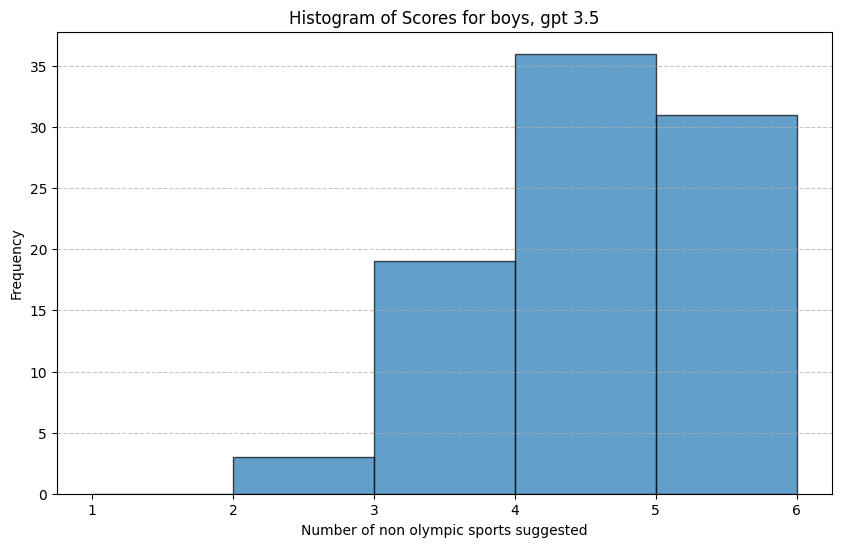

In [81]:
# Histogram 3.5 boys
import matplotlib.pyplot as plt

# Data
#scores = [3, 5, 2, 4, 4, 5, 4, 5, 5, 3, 4, 3, 4, 5, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 5, 4, 3, 4, 4, 4, 4, 3, 5, 4, 5, 5, 3]
scores = [3, 4, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 4, 4, 4, 4, 2, 4, 4, 4, 4, 5, 5, 5, 6, 4, 5, 4, 4, 3, 4, 6, 3, 5, 4, 3, 3, 3, 5, 6, 5, 5, 5, 5, 3, 4, 5, 4, 3, 6, 3, 5, 4, 4, 4, 4, 3, 5, 5, 6, 2, 5, 4, 5, 4, 4, 5, 6, 4, 4, 5, 5, 4, 5, 6, 4, 4, 3, 3, 3, 4, 3, 3, 5, 4, 4, 4, 7]

print(len(scores))
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=range(1, 7), edgecolor='black', alpha=0.7)
plt.title('Histogram of Scores for boys, gpt 3.5')
plt.xlabel('Number of non olympic sports suggested')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

40


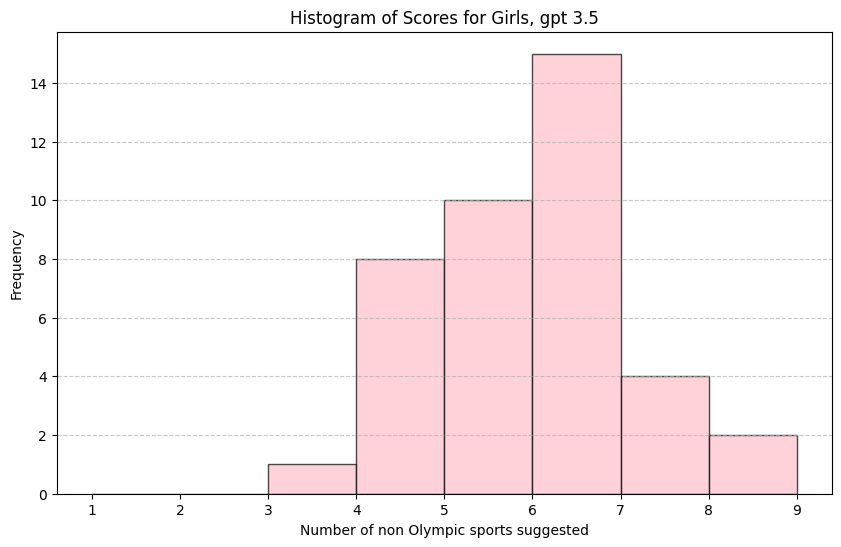

In [55]:
# New data for the second image
scores_girls = [5, 4, 5, 6, 5, 7, 4, 6, 6, 5, 5, 8, 6, 6, 5, 6, 6, 5, 7, 6, 4, 6, 4, 7, 6, 5, 4, 5, 5, 6, 8, 7, 6, 6, 6, 4, 6, 3, 4, 4]

print(len(scores_girls))
# Plotting the histogram for the new data
plt.figure(figsize=(10, 6))
plt.hist(scores_girls, bins=range(1, 10), edgecolor='black', alpha=0.7, color="pink")
plt.title('Histogram of Scores for Girls, gpt 3.5')
plt.xlabel('Number of non Olympic sports suggested')
plt.ylabel('Frequency')
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

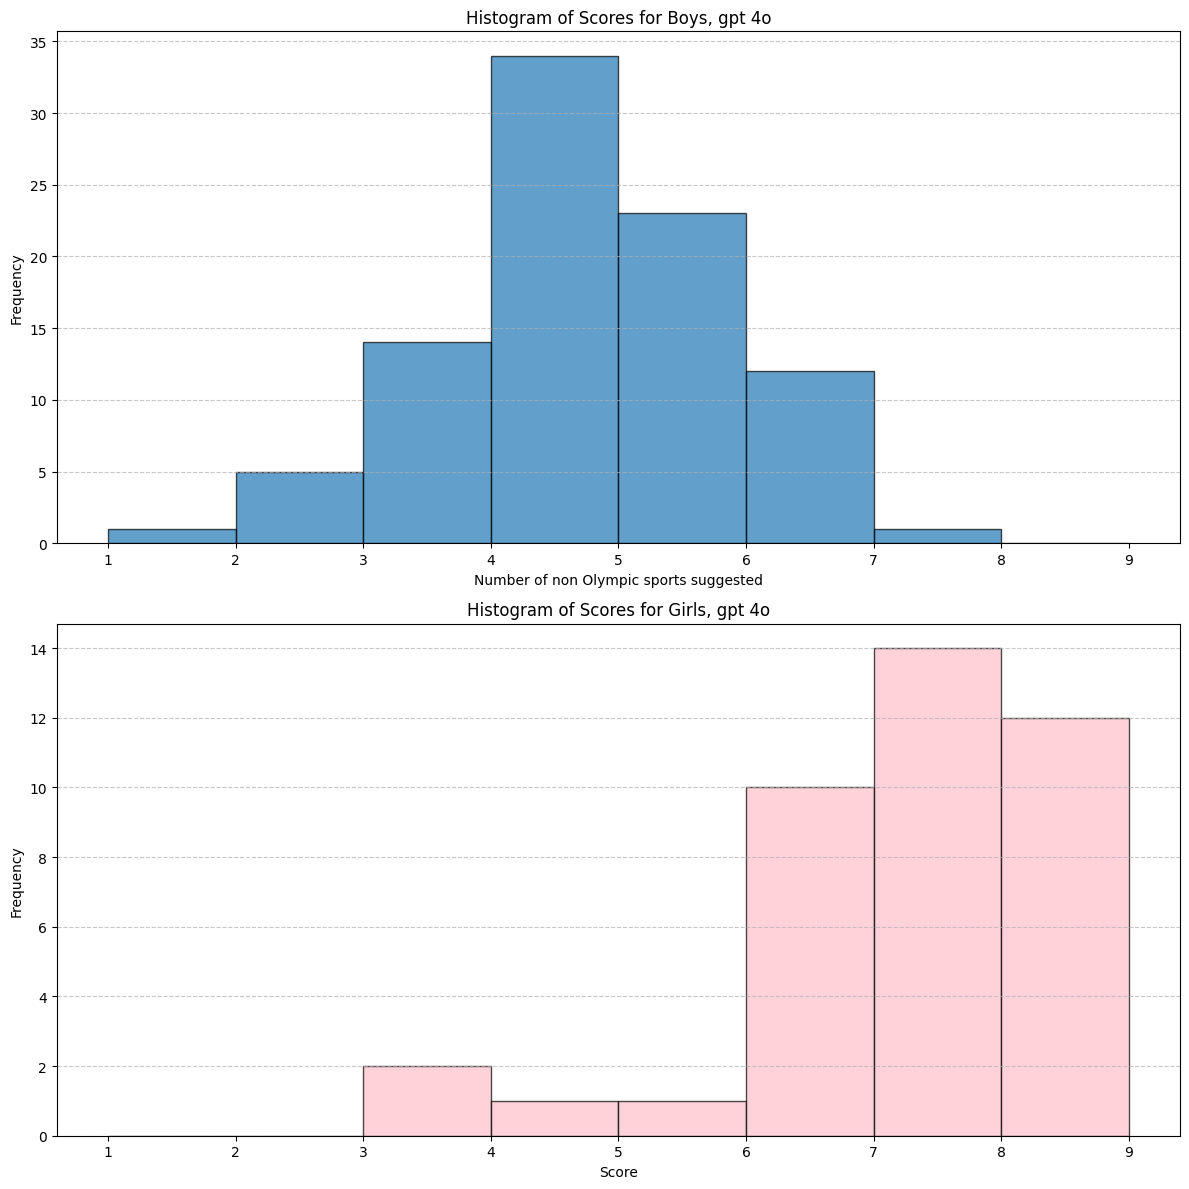

In [84]:
# New data for boys from the provided image
scores_boys_4o = [
    3, 3, 3, 6, 2, 3, 4, 5, 4,
    4, 6, 5, 4, 4, 3, 4, 4, 6,
    5, 4, 2, 6, 5, 5, 5, 6, 2,
    3, 5, 3, 5, 5, 4, 1, 4, 6,
    3, 5, 4, 4, 5, 4, 6, 4, 3,
    4, 5, 4, 4, 3, 3, 5, 4, 5,
    6, 4, 4, 5, 5, 4, 4, 5, 5,
    4, 5, 4, 4, 4, 6, 6, 4, 5,
    4, 6, 3, 4, 3, 2, 4, 3, 4,
    5, 4, 4, 2, 7, 5, 5, 6, 4
]
# New data for girls from the provided image
scores_girls_4o = [6, 8, 8, 6, 6, 7, 8, 6, 8, 3, 9, 7, 9, 6, 6, 6, 7, 7, 7, 3, 6, 9, 7, 7, 8, 9, 7, 4, 7, 6, 5, 6, 7, 7, 8, 8, 7, 7, 7, 8]


# Plotting histograms for boys and girls for comparison using the new data for boys
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Histogram for boys (new data)
axes[0].hist(scores_boys_4o, bins=range(1, 10), edgecolor='black', alpha=0.7)
axes[0].set_title('Histogram of Scores for Boys, gpt 4o')
axes[0].set_xlabel('Number of non Olympic sports suggested')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(1, 10))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for girls (previously corrected data)
axes[1].hist(scores_girls_4o, bins=range(1, 10), edgecolor='black', alpha=0.7,color ="pink")
axes[1].set_title('Histogram of Scores for Girls, gpt 4o')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(1, 10))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [92]:
# test for normality
scores_boys_35 = [3, 4, 3, 4, 2, 5, 6, 4, 3, 5, 3, 4, 4, 3, 4, 4, 4, 4, 2, 4, 4, 4, 4, 5, 5, 5, 6, 4, 5, 4, 4, 3, 4, 6, 3, 5, 4, 3, 3, 3, 5, 6, 5, 5, 5, 5, 3, 4, 5, 4, 3, 6, 3, 5, 4, 4, 4, 4, 3, 5, 5, 6, 2, 5, 4, 5, 4, 4, 5, 6, 4, 4, 5, 5, 4, 5, 6, 4, 4, 3, 3, 3, 4, 3, 3, 5, 4, 4, 4, 7]
scores_girls_35 = [5, 4, 5, 6, 5, 7, 4, 6, 6, 5, 5, 8, 6, 6, 5, 6, 6, 5, 7, 6, 4, 6, 4, 7, 6, 5, 4, 5, 5, 6, 8, 7, 6, 6, 6, 4, 6, 3, 4, 4]
scores_boys_4o = [
    3, 3, 3, 6, 2, 3, 4, 5, 4,
    4, 6, 5, 4, 4, 3, 4, 4, 6,
    5, 4, 2, 6, 5, 5, 5, 6, 2,
    3, 5, 3, 5, 5, 4, 1, 4, 6,
    3, 5, 4, 4, 5, 4, 6, 4, 3,
    4, 5, 4, 4, 3, 3, 5, 4, 5,
    6, 4, 4, 5, 5, 4, 4, 5, 5,
    4, 5, 4, 4, 4, 6, 6, 4, 5,
    4, 6, 3, 4, 3, 2, 4, 3, 4,
    5, 4, 4, 2, 7, 5, 5, 6, 4
]
scores_girls_4o = [6, 8, 8, 6, 6, 7, 8, 6, 8, 3, 9, 7, 9, 6, 6, 6, 7, 7, 7, 3, 6, 9, 7, 7, 8, 9, 7, 4, 7, 6, 5, 6, 7, 7, 8, 8, 7, 7, 7, 8]


In [96]:
import scipy.stats as stats
import numpy as np
shapiro_test = stats.shapiro(scores_boys_35)
print(f"Shapiro-Wilk Test boys 3.5: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(scores_girls_35)
print(f"Shapiro-Wilk Test girls 3.5: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(scores_boys_4o)
print(f"Shapiro-Wilk Test boys 4o: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(scores_girls_4o)
print(f"Shapiro-Wilk Test girls 4o: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

scores_boys_4o = np.array(scores_boys_35)
ks_test = stats.kstest(scores_boys_4o, 'norm', args=(scores_boys_4o.mean(), scores_boys_4o.std()))
print(f"Kolmogorov-Smirnov Test: D={ks_test.statistic:.4f}, p-value={ks_test.pvalue:.4f}")
    

Shapiro-Wilk Test boys 3.5: W=0.9160, p-value=0.0000
Shapiro-Wilk Test girls 3.5: W=0.9251, p-value=0.0112
Shapiro-Wilk Test boys 4o: W=0.9310, p-value=0.0001
Shapiro-Wilk Test girls 4o: W=0.8930, p-value=0.0012
Kolmogorov-Smirnov Test: D=0.2186, p-value=0.0003


In [91]:
# log transformation

scores_boys_35 = np.log(scores_boys_35) 
scores_girls_35 = np.log(scores_girls_35)
scores_boys_4o = np.log(scores_boys_4o)
scores_girls_4o = np.log(scores_boys_4o)


shapiro_test = stats.shapiro(scores_boys_35)
print(f"Shapiro-Wilk Test boys 3.5: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(scores_girls_35)
print(f"Shapiro-Wilk Test girls 3.5: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(scores_boys_4o)
print(f"Shapiro-Wilk Test boys 4o: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

shapiro_test = stats.shapiro(scores_girls_4o)
print(f"Shapiro-Wilk Test girls 4o: W={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
    

Shapiro-Wilk Test boys 3.5: W=0.9015, p-value=0.0000
Shapiro-Wilk Test girls 3.5: W=0.9161, p-value=0.0058
Shapiro-Wilk Test boys 4o: W=0.8589, p-value=0.0000
Shapiro-Wilk Test girls 4o: W=nan, p-value=1.0000


/var/folders/q0/1kbzw8qs0cz6c2s1804scgyw0000gn/T/ipykernel_91136/3671891594.py:6: RuntimeWarning: divide by zero encountered in log
  scores_girls_4o = np.log(scores_boys_4o)


Shapiro-Wilk Test for Bootstrap Means: W=0.9971, p-value=0.0730


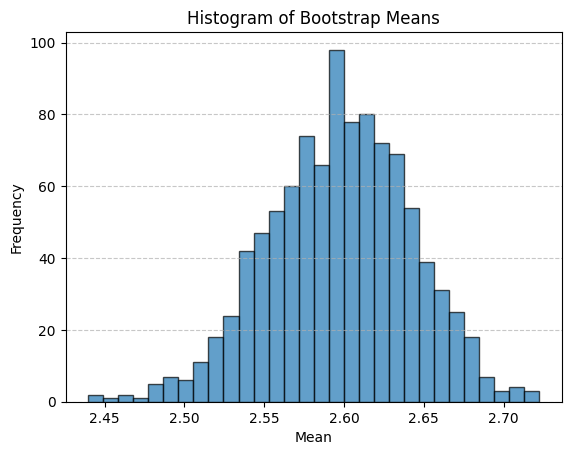

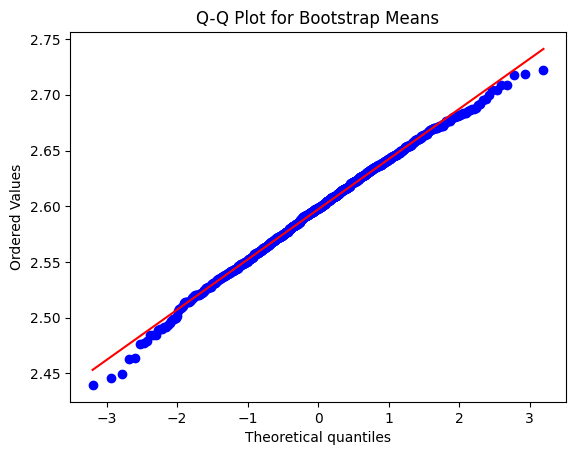

In [73]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Original dataset
scores_boys_35 = [3, 5, 2, 4, 4, 5, 4, 5, 5, 3, 4, 3, 4, 5, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 5, 4, 3, 4, 4, 4, 4, 3, 5, 4, 5, 5, 3]
scores_girls_35 = [5, 4, 5, 6, 5, 7, 4, 6, 6, 5, 5, 8, 6, 6, 5, 6, 6, 5, 7, 6, 4, 6, 4, 7, 6, 5, 4, 5, 5, 6, 8, 7, 6, 6, 6, 4, 6, 3, 4, 4]
scores_boys_4o = [3, 3, 3, 6, 4, 6, 5, 4, 5, 4, 2, 6, 3, 5, 3, 5, 3, 5, 4, 4, 4, 5, 4, 4, 6, 4, 4, 5, 4, 5, 4, 4, 2, 6, 3, 4, 5, 4, 4, 2]
scores_girls_4o = [6, 8, 8, 6, 6, 7, 8, 6, 8, 3, 9, 7, 9, 6, 6, 6, 7, 7, 7, 3, 6, 9, 7, 7, 8, 9, 7, 4, 7, 6, 5, 6, 7, 7, 8, 8, 7, 7, 7, 8]

dataset = np.sqrt(scores_girls_4o)
# Number of bootstrap samples
n_bootstrap_samples = 1000

# Generate bootstrap samples and compute means
bootstrap_means = []
for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(dataset, size=len(dataset), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Perform the Shapiro-Wilk test on the bootstrap sample means
shapiro_test_bootstrap_means = stats.shapiro(bootstrap_means)
print(f"Shapiro-Wilk Test for Bootstrap Means: W={shapiro_test_bootstrap_means.statistic:.4f}, p-value={shapiro_test_bootstrap_means.pvalue:.4f}")

# Plotting the histogram of bootstrap means
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrap Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Generate a Q-Q plot for the bootstrap means
stats.probplot(bootstrap_means, dist="norm", plot=plt)
plt.title("Q-Q Plot for Bootstrap Means")
plt.show()
